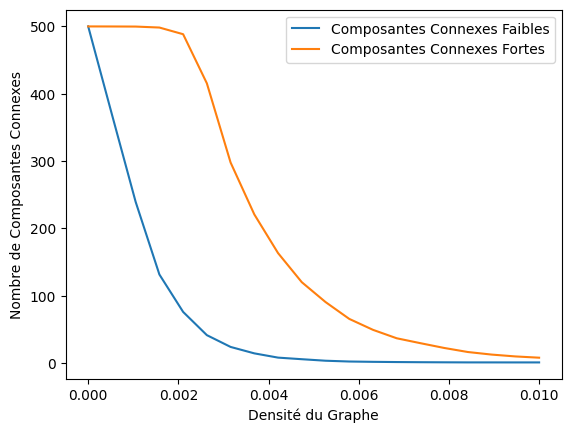

In [205]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

densities = np.linspace(0, 0.01, 20)
num_connected_components_strong = []
num_connected_components_weak = []
occurance = 100
nb_nodes = 500
for density in densities:
    average_connected_components_strong = 0
    average_connected_components_weak = 0
    for i in range(occurance):
        G = nx.fast_gnp_random_graph(nb_nodes, density, directed=True)
        average_connected_components_strong += nx.number_strongly_connected_components(G)
        average_connected_components_weak += nx.number_weakly_connected_components(G)
    num_connected_components_strong.append(average_connected_components_strong/occurance)
    num_connected_components_weak.append(average_connected_components_weak/occurance)

# Visualisation de la densité par rapport au nombre de composantes connexes
plt.plot(densities, num_connected_components_weak, marker='')
plt.plot(densities, num_connected_components_strong, marker='')
plt.legend(['Composantes Connexes Faibles', 'Composantes Connexes Fortes'])
plt.xlabel('Densité du Graphe')
plt.ylabel('Nombre de Composantes Connexes')
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

densities = np.linspace(0, 0.1, 100)
L = []
occurance = 100
nb_nodes = np.arange(100, 1050, 50)
for nodes in nb_nodes:
    print(nodes)
    num_connected_components_strong = []
    num_connected_components_weak = []
    for density in densities:
        average_connected_components_strong = 0
        average_connected_components_weak = 0
        for i in range(occurance):
            G = nx.fast_gnp_random_graph(nodes, density, directed=True)
            average_connected_components_strong += nx.number_strongly_connected_components(G)
            average_connected_components_weak += nx.number_weakly_connected_components(G)
        num_connected_components_strong.append(average_connected_components_strong/occurance)
        num_connected_components_weak.append(average_connected_components_weak/occurance)
    L.append([nodes, num_connected_components_weak, num_connected_components_strong])

# Visualisation de la densité par rapport au nombre de composantes connexes
# plt.plot(densities, num_connected_components_weak, marker='')
# plt.plot(densities, num_connected_components_strong, marker='')
# plt.legend(['Composantes Connexes Faibles', 'Composantes Connexes Fortes'])
# plt.xlabel('Densité du Graphe')
# plt.ylabel('Nombre de Composantes Connexes')
# plt.show()

In [112]:
# Enregistrement des données dans un fichier csv
import csv
with open('nb_connected_components.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(['Nombre de Noeuds', 'Composantes Connexes Faibles', 'Composantes Connexes Fortes'])
    for i in L:
        spamwriter.writerow([i[0], i[1], i[2]])

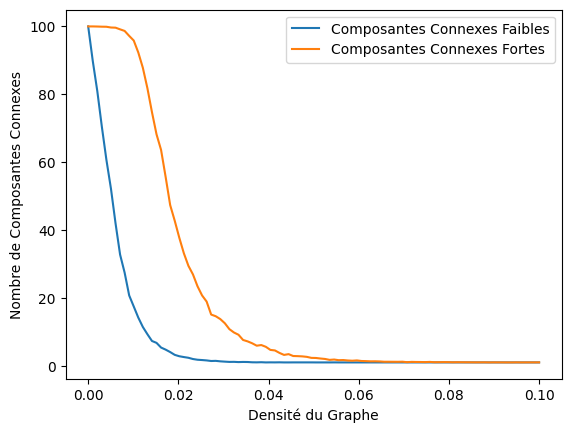

In [117]:
densities = np.linspace(0, 0.1, 100)


plt.plot(densities, L[0][1], marker='')
plt.plot(densities, L[0][2], marker='')
plt.legend(['Composantes Connexes Faibles', 'Composantes Connexes Fortes'])
plt.xlabel('Densité du Graphe')
plt.ylabel('Nombre de Composantes Connexes')
plt.show()

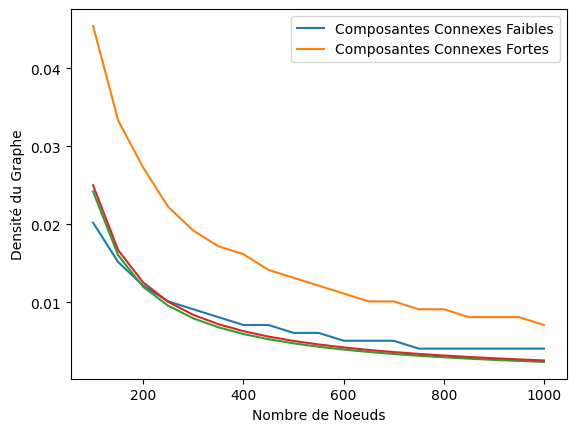

In [140]:
L_weak = []
L_strong = []
limit = 3

for i in range(len(L)):
    # Premier terme dont le nombre de composantes connexes est inférieur à 10:
    for j in range(len(L[i][1])):
        if L[i][1][j] < limit:
            L_weak.append([L[i][0], densities[j]])
            break
    for j in range(len(L[i][2])):
        if L[i][2][j] < limit:
            L_strong.append([L[i][0], densities[j]])
            break

plt.plot(*zip(*L_weak), marker='')
plt.plot(*zip(*L_strong), marker='')
plt.plot(np.arange(100, 1050, 50), 2.605*np.arange(100, 1050, 50)**(-1.016), marker='')
plt.plot(np.arange(100, 1050, 50), 2.454*np.arange(100, 1050, 50)**(-0.996), marker='') 
plt.legend(['Composantes Connexes Faibles', 'Composantes Connexes Fortes'])
plt.xlabel('Nombre de Noeuds')
plt.ylabel('Densité du Graphe')
plt.show()

In [32]:
def density(nb_nodes):
    return nb_nodes**(-1.016)*2.605

print(density(100.0))

0.02419957437561734


In [24]:
import networkx as nx

# Paramètres
num_nodes = 10000
density = 0.0002248

# Générer le graphe
graph = nx.fast_gnp_random_graph(num_nodes, density, directed=True)

# Visualiser le graphe
# pos = nx.spring_layout(graph)
# nx.draw(graph, pos, with_labels=True, arrowsize=15, font_size=10, node_size=700, node_color="skyblue", font_color="black", font_weight="bold")
# plt.show()

neighbors_in_average = 0
neighbors_out_average = 0
neighbors_average = 0
neighbors_in_max = 0
neighbors_out_max = 0
neighbors_max = 0
for node in graph.nodes():
    neighbors_in_average += len(list(graph.predecessors(node)))
    neighbors_out_average += len(list(graph.successors(node)))
    neighbors_average += len(list(graph.neighbors(node)))
    neighbors_in_max = max(neighbors_in_max, len(list(graph.predecessors(node))))
    neighbors_out_max = max(neighbors_out_max, len(list(graph.successors(node))))
    neighbors_max = max(neighbors_max, len(list(graph.neighbors(node))))
neighbors_in_average /= num_nodes
neighbors_out_average /= num_nodes
neighbors_average /= num_nodes

print("Nombre de voisins entrants moyen: ", neighbors_in_average)
print("Nombre de voisins sortants moyen: ", neighbors_out_average)
print("Nombre de voisins moyen: ", neighbors_average)
print("Nombre de voisins entrants maximum: ", neighbors_in_max)
print("Nombre de voisins sortants maximum: ", neighbors_out_max)
print("Nombre de voisins maximum: ", neighbors_max)
    


Nombre de voisins entrants moyen:  2.2598
Nombre de voisins sortants moyen:  2.2598
Nombre de voisins moyen:  2.2598
Nombre de voisins entrants maximum:  10
Nombre de voisins sortants maximum:  11
Nombre de voisins maximum:  11


196


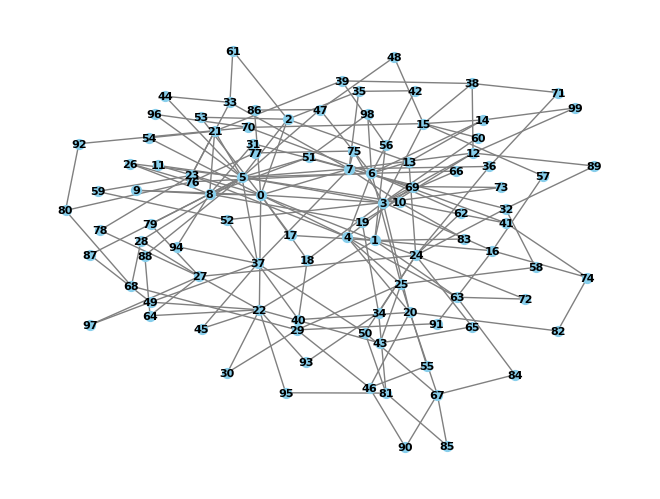

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_road_network(num_nodes, num_edges):
    G = nx.barabasi_albert_graph(num_nodes, 2)  # Modèle de Barabási-Albert
    edges_to_add = num_edges - G.number_of_edges()
    print(G.number_of_edges())

    for _ in range(edges_to_add):
        node1 = random.choice(list(G.nodes))
        node2 = random.choice(list(G.nodes - set([node1])))
        G.add_edge(node1, node2)

    return G

def plot_road_network(G):
    pos = nx.spring_layout(G)  # Positionnement des nœuds
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=50, node_color='skyblue', edge_color='gray', linewidths=1, font_size=8)
    plt.show()

# Exemple d'utilisation
num_nodes = 100
num_edges = 40
road_network = generate_random_road_network(num_nodes, num_edges)
plot_road_network(road_network)


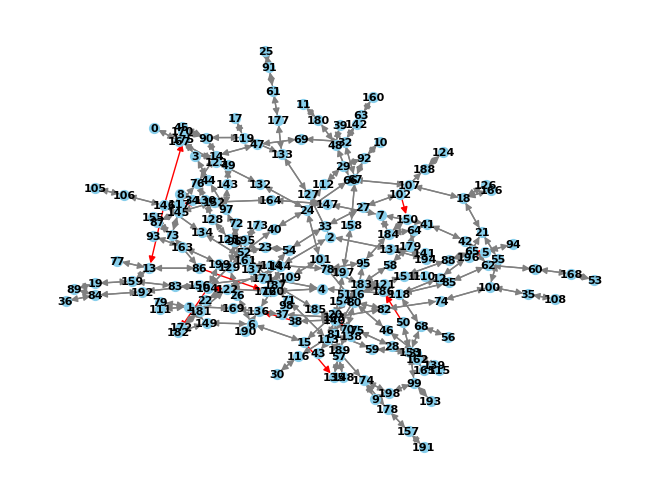

Nombre de voisins entrants moyen:  2.29
Nombre de voisins sortants moyen:  2.29
Nombre de voisins moyen:  2.29
Nombre de voisins entrants maximum:  6
Nombre de voisins sortants maximum:  6
Nombre de voisins maximum:  6
Densité:  0.011507537688442211 expected:  0.011966337623141395
Ration edges:  2.29 expected:  2.3


In [8]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def density_expected(nb_nodes):
    return nb_nodes**(-1.016)*2.605

def create_node(G, i, nodes_nb, oneway_proportion, edges_per_nodes_int):
    if random.random() < oneway_proportion:
        node_2 = random.randint(0, nodes_nb - 1)
        while node_2 == i:
            node_2 = random.randint(0, nodes_nb - 1)
        G.add_edge(i, node_2)
        edges_per_nodes_int -= 1
    else:
        node_2 = random.randint(0, nodes_nb - 1)
        while node_2 == i:
            node_2 = random.randint(0, nodes_nb - 1)
        G.add_edge(i, node_2)
        G.add_edge(node_2, i)
        edges_per_nodes_int -= 2

    return max(0, edges_per_nodes_int)

def graphe_gen(nodes_nb, edges_per_nodes, oneway_proportion):
    # Création du graphe
    G = nx.DiGraph()
    G.add_nodes_from(range(nodes_nb))

    # Création des arcs
    for i in range(nodes_nb):
        edges_per_nodes_int = edges_per_nodes//1
        edges_per_nodes_float = (edges_per_nodes - edges_per_nodes_int)/(2-oneway_proportion)
        while edges_per_nodes_int > 0 or edges_per_nodes_float > 0:
            if edges_per_nodes_int > 0:
                edges_per_nodes_int = create_node(G, i, nodes_nb, oneway_proportion, edges_per_nodes_int)
            elif edges_per_nodes_float > 0:
                if random.random() < edges_per_nodes_float:
                    create_node(G, i, nodes_nb, oneway_proportion, 1)
                edges_per_nodes_float = 0
    return G

# Exemple d'utilisation
nodes_nb = 200
edges_per_nodes = 2.3
oneway_proportion = 0.05
G = graphe_gen(nodes_nb, edges_per_nodes, oneway_proportion)

#afficher en rouge les edges à sens unique
edges = G.edges()
colors = []
for (u,v) in edges:
    if not G.has_edge(v,u):
        colors.append('red')
    else:
        colors.append('gray')


pos = nx.spring_layout(G)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=50, node_color='skyblue', edge_color=colors, linewidths=1, font_size=8)
plt.show()

graph = G
neighbors_in_average = 0
neighbors_out_average = 0
neighbors_average = 0
neighbors_in_max = 0
neighbors_out_max = 0
neighbors_max = 0
for node in G.nodes():
    neighbors_in_average += len(list(graph.predecessors(node)))
    neighbors_out_average += len(list(graph.successors(node)))
    neighbors_average += len(list(graph.neighbors(node)))
    neighbors_in_max = max(neighbors_in_max, len(list(graph.predecessors(node))))
    neighbors_out_max = max(neighbors_out_max, len(list(graph.successors(node))))
    neighbors_max = max(neighbors_max, len(list(graph.neighbors(node))))
neighbors_in_average /= nodes_nb
neighbors_out_average /= nodes_nb
neighbors_average /= nodes_nb
density = len(G.edges())/(nodes_nb*(nodes_nb-1))
ration_edges = len(G.edges())/(nodes_nb)


print("Nombre de voisins entrants moyen: ", neighbors_in_average)
print("Nombre de voisins sortants moyen: ", neighbors_out_average)
print("Nombre de voisins moyen: ", neighbors_average)
print("Nombre de voisins entrants maximum: ", neighbors_in_max)
print("Nombre de voisins sortants maximum: ", neighbors_out_max)
print("Nombre de voisins maximum: ", neighbors_max)
print("Densité: ", density, "expected: ", density_expected(nodes_nb))
print("Ration edges: ", ration_edges, "expected: ", edges_per_nodes)

------------------------------------
Nombre de noeuds:  199
Nombre de voisins entrants moyen:  2.306532663316583
Nombre de voisins sortants moyen:  2.306532663316583
Nombre de voisins moyen:  2.306532663316583
Nombre de voisins entrants maximum:  7
Nombre de voisins sortants maximum:  7
Nombre de voisins maximum:  7
Densité:  0.011649154865235267 expected:  0.012027434542625143
Ration edges:  2.306532663316583 expected:  2.3
------------------------------------

Nombre de noeuds à supprimer: 62
------------------------------------
Nombre de noeuds:  174
Nombre de voisins entrants moyen:  2.7586206896551726
Nombre de voisins sortants moyen:  2.7586206896551726
Nombre de voisins moyen:  2.7586206896551726
Nombre de voisins entrants maximum:  7
Nombre de voisins sortants maximum:  7
Nombre de voisins maximum:  7
Densité:  0.015945784333266894 expected:  0.01378509271422063
Ration edges:  2.7586206896551726 expected:  2.3
------------------------------------



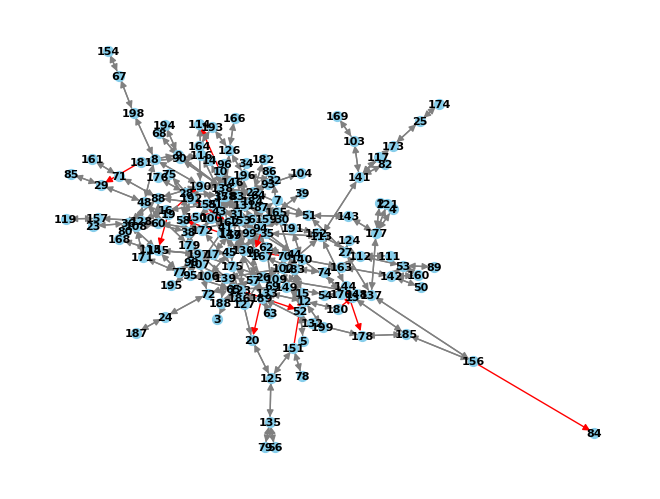

In [89]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def density_expected(nb_nodes):
    return nb_nodes**(-1.016)*2.605

def create_node(G, i, nodes_nb, oneway_proportion, edges_per_nodes_int):
    if random.random() < oneway_proportion:
        node_2 = random.randint(0, nodes_nb - 1)
        while node_2 == i:
            node_2 = random.randint(0, nodes_nb - 1)
        G.add_edge(i, node_2)
        edges_per_nodes_int -= 1
    else:
        node_2 = random.randint(0, nodes_nb - 1)
        while node_2 == i:
            node_2 = random.randint(0, nodes_nb - 1)
        G.add_edge(i, node_2)
        G.add_edge(node_2, i)
        edges_per_nodes_int -= 2

    return max(0, edges_per_nodes_int)

def graph_gen(nodes_nb, edges_per_nodes, oneway_proportion):
    # Création du graphe
    G = nx.DiGraph()
    G.add_nodes_from(range(nodes_nb))

    # Création des arcs
    for i in range(nodes_nb):
        edges_per_nodes_int = edges_per_nodes//1
        edges_per_nodes_float = (edges_per_nodes - edges_per_nodes_int)/(2-oneway_proportion)
        while edges_per_nodes_int > 0 or edges_per_nodes_float > 0:
            if edges_per_nodes_int > 0:
                edges_per_nodes_int = create_node(G, i, nodes_nb, oneway_proportion, edges_per_nodes_int)
            elif edges_per_nodes_float > 0:
                if random.random() < edges_per_nodes_float:
                    create_node(G, i, nodes_nb, oneway_proportion, 1)
                edges_per_nodes_float = 0
    return G

def graph_gen_add(nodes_nb, edges_per_nodes, oneway_proportion, graph = None):
    initial_nodes_nb = 0
    # Création du graphe
    if graph == None:
        G = nx.DiGraph()
        G.add_nodes_from(range(nodes_nb))
    else:
        G = graph
        if nodes_nb > len(G.nodes()):
            initial_nodes_nb = len(G.nodes())
            G.add_nodes_from(range(initial_nodes_nb, nodes_nb))
        else:
            print("nodes_nb must be greater than the number of nodes in the graph")
            return G

    # Création des arcs
    for i in range(initial_nodes_nb, nodes_nb):
        edges_per_nodes_int = edges_per_nodes//1
        edges_per_nodes_float = (edges_per_nodes - edges_per_nodes_int)/(2-oneway_proportion)
        while edges_per_nodes_int > 0 or edges_per_nodes_float > 0:
            if edges_per_nodes_int > 0:
                edges_per_nodes_int = create_node(G, i, nodes_nb, oneway_proportion, edges_per_nodes_int)
            elif edges_per_nodes_float > 0:
                if random.random() < edges_per_nodes_float:
                    create_node(G, i, nodes_nb, oneway_proportion, 1)
                edges_per_nodes_float = 0
    return G

def info(graph):
    nb_nodes = len(graph.nodes())
    neighbors_in_average = 0
    neighbors_out_average = 0
    neighbors_average = 0
    neighbors_in_max = 0
    neighbors_out_max = 0
    neighbors_max = 0
    for node in G.nodes():
        neighbors_in_average += len(list(graph.predecessors(node)))
        neighbors_out_average += len(list(graph.successors(node)))
        neighbors_average += len(list(graph.neighbors(node)))
        neighbors_in_max = max(neighbors_in_max, len(list(graph.predecessors(node))))
        neighbors_out_max = max(neighbors_out_max, len(list(graph.successors(node))))
        neighbors_max = max(neighbors_max, len(list(graph.neighbors(node))))
    neighbors_in_average /= nb_nodes
    neighbors_out_average /= nb_nodes
    neighbors_average /= nb_nodes
    density = len(G.edges())/(nb_nodes*(nb_nodes-1))
    ration_edges = len(G.edges())/(nb_nodes)

    print("------------------------------------")
    print("Nombre de noeuds: ", nb_nodes)
    print("Nombre de voisins entrants moyen: ", neighbors_in_average)
    print("Nombre de voisins sortants moyen: ", neighbors_out_average)
    print("Nombre de voisins moyen: ", neighbors_average)
    print("Nombre de voisins entrants maximum: ", neighbors_in_max)
    print("Nombre de voisins sortants maximum: ", neighbors_out_max)
    print("Nombre de voisins maximum: ", neighbors_max)
    print("Densité: ", density, "expected: ", density_expected(nb_nodes))
    print("Ration edges: ", ration_edges, "expected: ", edges_per_nodes)
    print("------------------------------------\n")

def graph_attributes(graph):
    #afficher en rouge les edges à sens unique et ajouter les attributs de type et de vitesse
    G = graph
    edges = G.edges()
    for (u,v) in edges:
        if G.has_edge(v,u):
            G[u][v]['type'] = 'twoway'
            G[u][v]['color'] = 'gray'
            G[u][v]['speed'] = 1
            G[u][v]['length'] = 1
        else:
            G[u][v]['type'] = 'oneway'
            G[u][v]['color'] = 'red'
            G[u][v]['speed'] = 1
            G[u][v]['length'] = 1
    return G

def affichage(graph, length = False):
    G = graph
    pos = nx.spring_layout(G)  # Positionnement des nœuds
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=50, node_color='skyblue', edge_color=colors, linewidths=1, font_size=8)
    if length:
        labels = nx.get_edge_attributes(G,'length')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()

def graph_simplification(graph):
    # Identifier les nœuds avec une route entrante et une route sortante
    G = graph
    nodes_to_remove = []
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))
        if len(predecessors) == 2 and len(successors) == 2 and predecessors == successors:
            pred_edge_speed = G[predecessors[0]][node]['speed']
            succ_edge_speed = G[node][successors[0]]['speed']
            # Vérifier que la vitesse et le type de route sont les mêmes pour les deux arêtes à double sens
            if pred_edge_speed == succ_edge_speed:
                nodes_to_remove.append(node)
        elif len(predecessors) == 1 and len(successors) == 1 and predecessors[0] != successors[0]:
            pred_edge_speed = G[predecessors[0]][node]['speed']
            succ_edge_speed = G[node][successors[0]]['speed']
            # Vérifier que la vitesse et le type de route sont les mêmes pour les deux arêtes à sens unique
            if pred_edge_speed == succ_edge_speed:
                nodes_to_remove.append(node)
    print("Nombre de noeuds à supprimer: " + str(len(nodes_to_remove)))

    # Supprimer les nœuds et ajouter les routes directes entre les voisins
    for node in nodes_to_remove:
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))
        pred_edge_type = G[predecessors[0]][node]['type']
        pred_edge_color = G[predecessors[0]][node]['color']
        pred_edge_speed = G[predecessors[0]][node]['speed']
        pred_edge_length = G[predecessors[0]][node]['length']
        succ_edge_length = G[node][successors[0]]['length']
        G.remove_node(node)
        if len(predecessors) == 2 and len(successors) == 2:
            if not(G.has_edge(predecessors[0], successors[1])):
                G.add_edge(predecessors[0], successors[1], type=pred_edge_type, color=pred_edge_color, speed=pred_edge_speed, length=pred_edge_length+succ_edge_length)
            if not(G.has_edge(predecessors[1], successors[0])):
                G.add_edge(predecessors[1], successors[0], type=pred_edge_type, color=pred_edge_color, speed=pred_edge_speed, length=pred_edge_length+succ_edge_length)
        else :
            if not(G.has_edge(predecessors[0], successors[0])):
                G.add_edge(predecessors[0], successors[0], type=pred_edge_type, color=pred_edge_color, speed=pred_edge_speed, length=pred_edge_length+succ_edge_length)
    return G

# Exemple d'utilisation
nodes_nb = 200
edges_per_nodes = 2.3
oneway_proportion = 0.05

G = graph_gen(nodes_nb-1, edges_per_nodes, oneway_proportion)
G = graph_attributes(G)
info(G)
G = graph_simplification(G)
G = graph_gen_add(nodes_nb, edges_per_nodes, oneway_proportion, G)

edges = G.edges()
colors = []
for (u,v) in edges:
    if G.has_edge(v,u):
        colors.append('gray')
    else:
        colors.append('red')

info(G)
affichage(G, False)




In [130]:
L = [0, 0, 108272, 25011, 212945, 43158, 1978, 299, 62, 17, 1, 1, 0, 0]
total = 0
for i in range(len(L)):
    total += L[i]
total2 = total
for i in range(len(L)):
    total = total - L[i]
    L[i] = total/total2
print(L)

[0.276, 0.276, 0.088, 0.029, 0.1, 0.155, 0.059, 0.013, 0.004]
[0.5, 0.3, 0.2, 0, 0, 0, 0, 0, 0]
[1.0, 1.0, 0.7236154223166149, 0.6597701560202581, 0.11618812285574252, 0.0060192370527691556, 0.0009700212383597452, 0.00020676768501878777, 4.850106191798726e-05, 5.1053749387355005e-06, 2.5526874693677503e-06, 0.0, 0.0, 0.0]


In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def density_expected(nb_nodes):
    return nb_nodes**(-1.016)*2.605

def create_node(G, i_node, nodes_nb, oneway_proportion, edges_per_nodes_int, chaos, proba):
    placed = False
    while not placed:
        node_2 = random.randint(max(0, i_node-chaos), max(5,i_node-1))
        while node_2 == i_node:
            node_2 = random.randint(0, nodes_nb - 1)
        if node_2 in G.nodes():
            if not(G.has_edge(node_2, i_node)):
                neighbors_count = len(list(G.neighbors(node_2)))
                if random.random() < proba[neighbors_count]:
                    if random.random() < oneway_proportion:
                        if random.random() < oneway_proportion:
                            G.add_edge(i_node, node_2)
                            placed = True
                            edges_per_nodes_int -= 1
                        else:
                            G.add_edge(node_2, i_node)
                            G.add_edge(i_node, node_2)
                            placed = True
                            edges_per_nodes_int -= 2
    return max(0, edges_per_nodes_int)

def graph_gen_add(nodes_nb, edges_per_nodes, oneway_proportion, chaos, proba, graph = None):
    initial_nodes_nb = 0
    nodes_nb = int(nodes_nb*1.5)
    # Création du graphe
    if graph == None:
        G = nx.DiGraph()
        G.add_nodes_from(range(nodes_nb))
    else:
        G = graph
        if nodes_nb > len(G.nodes()):
            initial_nodes_nb = len(G.nodes())
            G.add_nodes_from(range(initial_nodes_nb, nodes_nb))
        else:
            print("nodes_nb must be greater than the number of nodes in the graph")
            return G

    # Création des arcs
    for i_node in range(initial_nodes_nb, nodes_nb):
        edges_per_nodes_int = edges_per_nodes//1
        edges_per_nodes_float = (edges_per_nodes - edges_per_nodes_int)/(2-oneway_proportion)
        while edges_per_nodes_int > 0 or edges_per_nodes_float > 0:
            if edges_per_nodes_int > 0:
                edges_per_nodes_int = create_node(G, i_node, nodes_nb, oneway_proportion, edges_per_nodes_int, chaos, proba)
            elif edges_per_nodes_float > 0:
                if random.random() < edges_per_nodes_float:
                    create_node(G, i_node, nodes_nb, oneway_proportion, 1, chaos, proba)
                edges_per_nodes_float = 0
    return graph_attributes(G)

def info(graph, proba = None):
    nb_nodes = len(graph.nodes())
    neighbors_average = 0
    neighbors_max = 0
    neighbors_hist = [0]*15
    for node in G.nodes():
        neighbors_hist[len(list(graph.neighbors(node)))] += 1
        neighbors_average += len(list(graph.neighbors(node)))
        neighbors_max = max(neighbors_max, len(list(graph.neighbors(node))))
    neighbors_average /= nb_nodes
    density = len(G.edges())/(nb_nodes*(nb_nodes-1))
    ration_edges = len(G.edges())/(nb_nodes)
    neighbors_hist_proportion = [0]*15
    for i in range(len(neighbors_hist)):
        neighbors_hist_proportion[i] = round(neighbors_hist[i]/nb_nodes,3)
    if proba != None:
        neighbors_hist_proportion_expected = [0]*15
        for i in range(len(proba)-2, -1, -1):
            neighbors_hist_proportion_expected[i] = round(proba[i-1] - proba[i],3)
        neighbors_hist_proportion_expected[0] = 0.0
        neighbors_hist_proportion_expected[-1] = 0.0
    oneway_average = 0
    for (u,v) in G.edges():
        if G[u][v]['type'] == 'oneway':
            oneway_average += 1
    oneway_average /= nb_nodes
    

    print("------------------------------------")
    print("Nombre de noeuds: ", nb_nodes)
    print("Nombre de voisins moyen: ", neighbors_average)
    print("Nombre de voisins maximum: ", neighbors_max)
    print("Density: ", round(density,5), "Expected: ", round(density_expected(nb_nodes),5))
    print("Ratio edges: ", round(ration_edges,3), "Expected: ", 2.3)
    print("One way proportion: ", round(oneway_average,3), "Expected: ", oneway_proportion)
    print("Neighbors histogram: ", neighbors_hist)
    print("Neighbors histogram proportion: ", neighbors_hist_proportion)
    print("Neighbors histogram expected:   ", neighbors_hist_proportion_expected)
    print("------------------------------------\n")

def graph_attributes(graph):
    #afficher en rouge les edges à sens unique et ajouter les attributs de type et de vitesse
    G = graph
    edges = G.edges()
    pos = nx.spring_layout(G)
    for (u,v) in edges:
        if G.has_edge(v,u):
            G[u][v]['type'] = 'twoway'
            G[u][v]['color'] = 'gray'
            G[u][v]['speed'] = 1
            G[u][v]['length'] = round(np.sqrt((pos[u][0]-pos[v][0])**2 + (pos[u][1]-pos[v][1])**2),4)
            G[u][v]['time'] = G[u][v]['length'] * G[u][v]['speed']
        else:
            G[u][v]['type'] = 'oneway'
            G[u][v]['color'] = 'red'
            G[u][v]['speed'] = 1
            G[u][v]['length'] = round(np.sqrt((pos[u][0]-pos[v][0])**2 + (pos[u][1]-pos[v][1])**2),4)
            G[u][v]['time'] = G[u][v]['length'] * G[u][v]['speed']
    for node in G.nodes():
        G.nodes[node]['x'] = pos[node][0]
        G.nodes[node]['y'] = pos[node][1]
    return G

def affichage(graph, length = False):
    G = graph
    edges = G.edges()
    colors = []
    for (u,v) in edges:
        if G.has_edge(v,u):
            colors.append('gray')
        else:
            colors.append('red')
    pos = nx.spring_layout(G)  # Positionnement des nœuds
    nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=5, node_color='skyblue', edge_color=colors, linewidths=1, font_size=8)
    if length:
        labels = nx.get_edge_attributes(G,'length')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size=5)
    plt.show()

def graph_simplification(graph):
    # Identifier les nœuds avec une route entrante et une route sortante
    G = graph
    nodes_to_remove = []
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))
        if len(predecessors) == 2 and len(successors) == 2 and predecessors == successors:
            pred_edge_speed = G[predecessors[0]][node]['speed']
            succ_edge_speed = G[node][successors[0]]['speed']
            # Vérifier que la vitesse et le type de route sont les mêmes pour les deux arêtes à double sens
            if pred_edge_speed == succ_edge_speed:
                nodes_to_remove.append(node)
        elif len(predecessors) == 1 and len(successors) == 1 and predecessors[0] != successors[0]:
            pred_edge_speed = G[predecessors[0]][node]['speed']
            succ_edge_speed = G[node][successors[0]]['speed']
            # Vérifier que la vitesse et le type de route sont les mêmes pour les deux arêtes à sens unique
            if pred_edge_speed == succ_edge_speed:
                nodes_to_remove.append(node)

    # Supprimer les nœuds et ajouter les routes directes entre les voisins
    for node in nodes_to_remove:
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))
        pred_edge_type = G[predecessors[0]][node]['type']
        pred_edge_color = G[predecessors[0]][node]['color']
        pred_edge_speed = G[predecessors[0]][node]['speed']
        pred_edge_length = G[predecessors[0]][node]['length']
        succ_edge_length = G[node][successors[0]]['length']
        G.remove_node(node)
        if len(predecessors) == 2 and len(successors) == 2:
            if not(G.has_edge(predecessors[0], successors[1])):
                G.add_edge(predecessors[0], successors[1], type=pred_edge_type, color=pred_edge_color, speed=pred_edge_speed, length=pred_edge_length+succ_edge_length)
            if not(G.has_edge(predecessors[1], successors[0])):
                G.add_edge(predecessors[1], successors[0], type=pred_edge_type, color=pred_edge_color, speed=pred_edge_speed, length=pred_edge_length+succ_edge_length)
        else :
            if not(G.has_edge(predecessors[0], successors[0])):
                G.add_edge(predecessors[0], successors[0], type=pred_edge_type, color=pred_edge_color, speed=pred_edge_speed, length=pred_edge_length+succ_edge_length)
    return G, len(nodes_to_remove)

# Exemple d'utilisation
nodes_nb = 1500
edges_per_nodes = 2.3*0.95
oneway_proportion = 0.7*2/3*8/9
chaos = 20
probability = [1.0, 0.724, 0.660, 0.116, 0.006, 0.001, 0.0002, 0.00005, 0.000005,0.000003, 0.0, 0.0, 0.0, 0.0, 0.0]

G = graph_gen_add(nodes_nb, edges_per_nodes, oneway_proportion, chaos, probability)
# info(G, probability)
# affichage(G, False)
G, nb_nodes_removed = graph_simplification(G)
info(G, probability)
# affichage(G, False)

import csv
with open('../Sources/nodes_generated_city.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(['node_id', 'lon', 'lat'])
    for node in G.nodes():
        spamwriter.writerow([node, G.nodes[node]['x'], G.nodes[node]['y']])

with open('../Sources/edges_generated_city.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(['node_id1', 'node_id2', 'speed', 'type', 'length'])
    for (u,v) in G.edges():
        spamwriter.writerow([u, v, G[u][v]['speed'], G[u][v]['type'], G[u][v]['length']])


------------------------------------
Nombre de noeuds:  2013
Nombre de voisins moyen:  2.4485842026825635
Nombre de voisins maximum:  5
Density:  0.00122 Expected:  0.00115
Ratio edges:  2.449 Expected:  2.3
One way proportion:  0.692 Expected:  0.41481481481481475
Neighbors histogram:  [0, 327, 584, 976, 124, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Neighbors histogram proportion:  [0.0, 0.162, 0.29, 0.485, 0.062, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Neighbors histogram expected:    [0.0, 0.276, 0.064, 0.544, 0.11, 0.005, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
------------------------------------



In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import random
from math import radians, cos, sin, asin, sqrt
from itertools import combinations
import time
import numpy as np
import pandas as pd

nodes_file_path = '../Sources/nodes_generated_city.csv'
edges_file_path = '../Sources/edges_generated_city.csv'


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in meters between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    r = r * 1000
    return c * r

def edges_within_distance_from_id(nodes_pos, origin_id, distance, perturbed_edges):
    """
    Returns a list of edges within a given distance from an origin point identified by its ID,
    and that are contained within the perturbed_edges list.

    Parameters:
    - nodes_pos: Dictionary of node positions with node IDs as keys and (longitude, latitude) as values
    - origin_id: ID of the origin point
    - distance: Distance range in kilometers
    - perturbed_edges: List of tuples representing perturbed edges, where each tuple is (node_id1, node_id2)
    """
    if origin_id not in nodes_pos:
        raise ValueError("Origin ID not found in nodes positions.")
    origin_lon, origin_lat = nodes_pos[origin_id]
    within_distance = []
    for node_id, (lon, lat) in nodes_pos.items():
        if haversine(origin_lon, origin_lat, lon, lat) <= distance:
            within_distance.append(node_id)
    filtered_edges = []
    for edge in perturbed_edges:
        u, v = edge
        if u in within_distance and v in within_distance:    
            filtered_edges.append(edge)
    return filtered_edges, len(within_distance)

def getNodes(nodes_file_path):
    nodes_list = []
    nodes_pos = {}  # Dictionary for node positions
    with open(nodes_file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        counter = 0
        for row in csv_reader:
            if counter == 0:
                counter += 1   
            else:
                node_id = str(row[0])
                longitude = float(row[1])
                latitude = float(row[2])
                nodes_list.append(node_id)
                nodes_pos[node_id] = (longitude, latitude)
    return nodes_list, nodes_pos

def setEdges(city, edges_file_path):
    with open(edges_file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        counter = 0
        for row in csv_reader:
            if counter == 0:
                counter += 1   
            else:
                if row[2] == 'default':
                    row[2] = 50
                city.add_edge(str(row[0]), str(row[1]), weight=float(row[4])/1000/float(row[2])*3600)
    return city   

def add_perturbations(graph, perturbed_edges, random = False):
    """Adds a consistent perturbation to the specified edges in the graph in one direction only.
    
    Parameters:
    - graph: A directed graph object from NetworkX.
    - perturbed_edges: A list of tuples representing the edges to be perturbed.
    """
    for edge in perturbed_edges:
        u, v = edge  # Unpack the edge tuple into start (u) and end (v) nodes
        if graph.has_edge(u, v):  # Check if the edge exists in the specified direction
            if random:
                graph[u][v]['weight'] += random.randint(1, 5) * weight_of_perturbation
            else:
                graph[u][v]['weight'] += weight_of_perturbation
        else:
            print(f"Edge {u} -> {v} not found in graph.")

    return perturbed_edges

def display_graph(graph, nodes_pos, shortest_path, perturbed_edges):
    # Draw the entire graph without labels
    nx.draw(graph, nodes_pos, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15)
    # Draw the shortest path in green
    path_edges = [(shortest_path[n], shortest_path[n+1]) for n in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(graph, nodes_pos, edgelist=path_edges, edge_color='green', width=2)
    # Draw the perturbed edges in red
    nx.draw_networkx_edges(graph, nodes_pos, edgelist=perturbed_edges, edge_color='red', width=2)
    plt.show()

def display_info(adjusted_path, total_seconds, source, target, type):
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    travel_time = f"{hours}h {minutes}min and {seconds}s"
    print("==================")
    print("Simulation type: " + type)
    print(f"Lenght of the path: {len(adjusted_path)}")
    print(f"Shortest path from {source} to {target}: {' -> '.join(adjusted_path)}")
    print(f"Travel time : {travel_time}")
    print("==================")

def s1(graph, source, target, perturbed_edges, random, display=True):
    """Simulation where perturbations are applied to the weights of the edges of the initial shortest path."""
    # Create a copy of the graph
    G_copy = graph.copy()
    # Find the shortest path before perturbations
    adjusted_path = nx.dijkstra_path(G_copy, source=source, target=target, weight='weight')
    # Apply perturbations
    add_perturbations(G_copy, perturbed_edges, random)
    # Recalculate the length of the initial path with perturbed weights
    perturbed_length = sum(G_copy[u][v]['weight'] for u, v in zip(adjusted_path, adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = perturbed_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S1")
    return adjusted_path, total_seconds

def s2(graph, source, target, perturbed_edges, random, display=True):
    # Create a copy of the graph
    perturbed_edges_copy = perturbed_edges.copy()
    G_copy = graph.copy()
    G_copy2 = graph.copy()
    # Apply perturbations before finding the path
    add_perturbations(G_copy2, perturbed_edges_copy, random)
    # Find the shortest path
    path = nx.dijkstra_path(G_copy, source=source, target=target, weight='weight')
    # Iteratively adjust the path if a perturbed edge is encountered
    adjusted_path = []
    current_node = source
    while current_node != target:
        next_node = path[path.index(current_node) + 1]
        adjusted_path.append(current_node)
        # Check if any edge from the current node is perturbed
        perturbed = False
        for next_node in G_copy.neighbors(current_node):
            if (current_node, next_node) in perturbed_edges_copy:
                perturbed = True
                # Add the perturbation on the copy
                G_copy[current_node][next_node]['weight'] = G_copy2[current_node][next_node]['weight']
        if(perturbed):
            # Restart djikstra to obtain the new calculated path
            path = nx.dijkstra_path(G_copy, source=current_node, target=target, weight='weight')
        current_node = path[path.index(current_node) + 1]
    adjusted_path.append(current_node)
    adjusted_length = sum(G_copy2[u][v]['weight'] for u, v in zip(adjusted_path[:-1], adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = adjusted_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S2")
    return adjusted_path, total_seconds

def s3(graph, nodes_pos, distance, source, target, perturbed_edges, random, display=True):
    # Create a copy of the graph
    G_copy = graph.copy()
    G_copy2 = graph.copy()
    perturbed_edges_copy = perturbed_edges.copy()
    # Apply perturbations before finding the path
    add_perturbations(G_copy2, perturbed_edges_copy, random)
    # Iteratively adjust the path if a perturbed edge is encountered
    adjusted_path = [source]
    current_node = source
    path = nx.dijkstra_path(G_copy, source=current_node, target=target, weight='weight')
    path_state = 0
    moy = 0
    compteur = 0
    while current_node != target:
        # Checking for perturbed edges directly on the path
        modified = False
        for node in G_copy.neighbors(current_node):
            if (current_node, node) in perturbed_edges_copy:
                G_copy[current_node][node]['weight'] = G_copy2[current_node][node]['weight']
                modified = True
        # Checking for perturbed edges near the current node
        nearby_perturbed_edges, moy2 = edges_within_distance_from_id(nodes_pos, current_node, distance, perturbed_edges_copy)
        moy += moy2
        compteur += 1
        for edge in nearby_perturbed_edges:
            u, v = edge
            G_copy[u][v]['weight'] = G_copy2[u][v]['weight']
            modified = True

        if modified:
            path = nx.dijkstra_path(G_copy, source=current_node, target=target, weight='weight')
            path_state = 1
        else:
            path_state += 1
            
        adjusted_path.append(path[path_state])
        current_node = path[path_state]
    # Calculation and display of travel time
    adjusted_length = sum(G_copy2[u][v]['weight'] for u, v in zip(adjusted_path[:-1], adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = adjusted_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S3")
    return (moy/compteur), adjusted_path, total_seconds

def s4(graph, source, target, perturbed_edges, random, display=True):
    G_copy = graph.copy()
    """Simulation where perturbations are applied before finding the shortest path."""
    # Apply perturbations before finding the path
    add_perturbations(G_copy, perturbed_edges, random)
    # Find the shortest path
    adjusted_path = nx.dijkstra_path(G_copy, source=source, target=target, weight='weight')
    # Display path info with perturbations considered
    perturbed_length = sum(G_copy[u][v]['weight'] for u, v in zip(adjusted_path, adjusted_path[1:]))
    # Convert to total minutes
    total_seconds = perturbed_length
    # Extract hours, minutes, and seconds
    if display:
        display_info(adjusted_path, total_seconds, source, target, "S4")
    return adjusted_path, total_seconds

if __name__ == '__main__':
    
    nodes, nodes_pos = getNodes(nodes_file_path)
    city = nx.DiGraph()
    city.add_nodes_from(nodes)
    city = setEdges(city, edges_file_path)
    all_edges = city.edges(data=False)
    edges_list = list(all_edges)
    edges_number = len(edges_list)
    
    E = []
    L1, L2, L3, L4 = [], [], [], []
    L = []
    l = len(nodes)
    max = l*(l-1)
    print("Nodes number: ", l, " Paths number: ", max)
    
    # Parameters
    random_perturbation = False
    number_of_experiments = 10
    number_of_paths = 10
    weight_of_perturbation = 60
    minimum_length = 40
    moy = 0
    for pourcentage in np.arange(0, 5.1, 0.5):
        t0 = time.time()
        for k in range(number_of_experiments):
            count = 0
            # create pourcentage pourcent of perturbed edges
            perturbed_edges = random.sample(edges_list, k = int(edges_number * pourcentage / 100))
            print("Starting experiment ", k+1, "/", number_of_experiments)
            while count < number_of_paths:
                try:
                    source = random.choice(nodes)
                    target = random.choice(nodes)

                    path_s1, travel_time_s1 = s1(city, source, target, perturbed_edges, random_perturbation, display=False)
                    #display_graph(city, nodes_pos, path_s1, perturbed_edges)
                    if len(path_s1) >= minimum_length:
                    
                        path_s2, travel_time_s2 = s2(city, source, target, perturbed_edges, random_perturbation, display=False)
                        #display_graph(city, nodes_pos, path_s2, perturbed_edges)
                        
                        moy2, path_s3, travel_time_s3 = s3(city, nodes_pos, 10*1000, source, target, perturbed_edges, random_perturbation, display=False)
                        #display_graph(city, nodes_pos, path_s3, perturbed_edges)
                        moy += moy2
                        
                        path_s4, travel_time_s4 = s4(city, source, target, perturbed_edges, random_perturbation, display=False)
                        #display_graph(city, nodes_pos, path_s4, perturbed_edges)

                        L.append([travel_time_s1, 
                                  travel_time_s2, 
                                  travel_time_s3, 
                                  travel_time_s4, 
                                  len(path_s1), 
                                  len(path_s2),
                                  len(path_s3),
                                  len(path_s4),
                                  k, 
                                  pourcentage])
                        
                        if count % 10 == 0:
                            print("Progress: ", pourcentage,"/",5, " ", k+1,"/", number_of_experiments, " ", count+1, "/", number_of_paths)
                        count += 1
                except nx.NetworkXNoPath:
                    # Code à exécuter si aucun chemin n'existe entre i et j
                    pass  # Vous pouvez remplacer "pass" par le code que vous voulez exécuter dans ce cas
        t1 = time.time()
        print(" Time elapsed: ", t1 - t0) 
    print("Average: ", moy/number_of_experiments/l/11/number_of_paths)                 

Nodes number:  2013  Paths number:  4050156
Starting experiment  1 / 10
Progress:  0.0 / 5   1 / 10   1 / 10
Starting experiment  2 / 10
Progress:  0.0 / 5   2 / 10   1 / 10
Starting experiment  3 / 10
Progress:  0.0 / 5   3 / 10   1 / 10
Starting experiment  4 / 10
Progress:  0.0 / 5   4 / 10   1 / 10
Starting experiment  5 / 10
Progress:  0.0 / 5   5 / 10   1 / 10
Starting experiment  6 / 10
Progress:  0.0 / 5   6 / 10   1 / 10
Starting experiment  7 / 10
Progress:  0.0 / 5   7 / 10   1 / 10
Starting experiment  8 / 10
Progress:  0.0 / 5   8 / 10   1 / 10
Starting experiment  9 / 10
Progress:  0.0 / 5   9 / 10   1 / 10
Starting experiment  10 / 10
Progress:  0.0 / 5   10 / 10   1 / 10
 Time elapsed:  31.26776385307312
Starting experiment  1 / 10
Progress:  0.5 / 5   1 / 10   1 / 10
Starting experiment  2 / 10
Progress:  0.5 / 5   2 / 10   1 / 10
Starting experiment  3 / 10
Progress:  0.5 / 5   3 / 10   1 / 10
Starting experiment  4 / 10
Progress:  0.5 / 5   4 / 10   1 / 10
Starting e

In [3]:
#enregistre les liste dans un fichier csv
path = '../Sources/simu3_692.csv'

with open(path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["L1", "L2", "L3", "L4", "len1", "len2", "len3", "len4", "experiment", "perturbation"])
    for row in L:
        writer.writerow(row)
print("Results saved")

df = pd.read_csv(path)
df.describe()

Results saved


,L1,L2,L3,L4,len1,len2,len3,len4,experiment,perturbation
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1100.000000,1100.000000,1100.000000,1100.000000
mean,137.321309,47.256551,43.616824,35.616677,70.060909,77.99000,77.172727,73.331818,4.500000,2.500000
std,115.664005,36.366823,31.701532,20.467858,25.855709,30.78841,30.222366,27.228416,2.873588,1.581858
min,12.369240,12.369240,12.369240,12.369240,40.000000,40.00000,40.000000,36.000000,0.000000,0.000000
25%,34.086240,23.905170,23.642910,22.586760,50.000000,53.00000,53.000000,51.000000,2.000000,1.000000
50%,95.416800,32.373180,31.725180,29.496060,63.000000,69.00000,69.000000,66.000000,4.500000,2.500000
75%,206.347860,55.229310,49.959720,41.348520,84.250000,97.00000,96.000000,90.250000,7.000000,4.000000
max,549.256080,271.956960,258.150240,195.970800,161.000000,205.00000,214.000000,184.000000,9.000000,5.000000
